In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score,auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_excel("Applicant-details.xlsx")

In [6]:
df = df.sample(frac=1)
df

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
65850,25747,479113,45,0,single,rented,yes,Comedian,Raichur,Karnataka,0,13,0
77987,53954,3939397,52,19,single,rented,yes,Flight_attendant,Chennai,Tamil_Nadu,3,10,0
48585,90849,2537444,49,1,single,rented,yes,Hotel_Manager,Muzaffarpur,Bihar,1,12,0
29289,70179,8043880,57,12,single,rented,no,Financial_Analyst,Kollam,Kerala,8,10,0
59665,92676,8623683,29,13,married,rented,no,Artist,Bhalswa_Jahangir_Pur,Delhi,5,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,21052,9684725,42,8,single,rented,no,Chef,Munger,Bihar,3,13,0
24672,6649,9179456,43,15,single,rented,no,Army_officer,Bellary,Karnataka,7,11,0
96071,19009,2449147,42,3,married,rented,no,Surgeon,Arrah,Bihar,3,12,0
33530,22315,9073203,71,13,single,rented,no,Architect,Suryapet,Telangana,9,10,1


In [7]:
#Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

#The resulting dataframe will have one-hot encoded columns
#for each of the categorical variables
output = df_encoded['Loan_Default_Risk']
df_new = df_encoded.drop('Applicant_ID',axis = 1)
df_new.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in df_new.columns]
df_new

,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,...,Residence_State_Punjab,Residence_State_Rajasthan,Residence_State_Sikkim,Residence_State_Tamil_Nadu,Residence_State_Telangana,Residence_State_Tripura,Residence_State_Uttar_Pradesh,Residence_State_Uttar_Pradesh5,Residence_State_Uttarakhand,Residence_State_West_Bengal
65850,479113,45,0,0,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
77987,3939397,52,19,3,10,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
48585,2537444,49,1,1,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29289,8043880,57,12,8,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
59665,8623683,29,13,5,14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,9684725,42,8,3,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
24672,9179456,43,15,7,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96071,2449147,42,3,3,12,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33530,9073203,71,13,9,10,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Model Implementation

In [24]:
test_len = int(len(df_new) * 0.99)

x_columns = df_new.columns.drop('Loan_Default_Risk')

# Train data
x_train = df_new[x_columns].iloc[:test_len]
y_train = df_new['Loan_Default_Risk'].iloc[:test_len]

# Test data
x_test = df_new[x_columns].iloc[test_len:]
y_test = df_new['Loan_Default_Risk'].iloc[test_len:]

In [25]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluating with an appropriate metric for classification
accuracy = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.4f}")
print(f"r2 Score: {r2:.4f}")

Accuracy: 0.8860
r2 Score: 0.0698



## Results


|          | 80%       | 90%        | 95%       | 99%      |
|:-------- |:----------|:----------|:----------|:----------|
| Accuracy |  0.8881   | 0.8860    | 0.8828   | 0.8860    |
| R2 Score | -0.0120   | -0.0359    |-0.0472   | 0.0698   |

## Model Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

#This will tell us the number of True positives, False negatives, False positives and True negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Check balance of classes
print("\nClass Distribution in Training Set:")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Test Set:")
print(pd.Series(y_test).value_counts())

Confusion Matrix:
[[855   2]
 [112  31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       857
           1       0.94      0.22      0.35       143

    accuracy                           0.89      1000
   macro avg       0.91      0.61      0.64      1000
weighted avg       0.89      0.89      0.85      1000


Class Distribution in Training Set:
0    86146
1    12854
Name: Loan_Default_Risk, dtype: int64

Class Distribution in Test Set:
0    857
1    143
Name: Loan_Default_Risk, dtype: int64


### Confusion Matrix

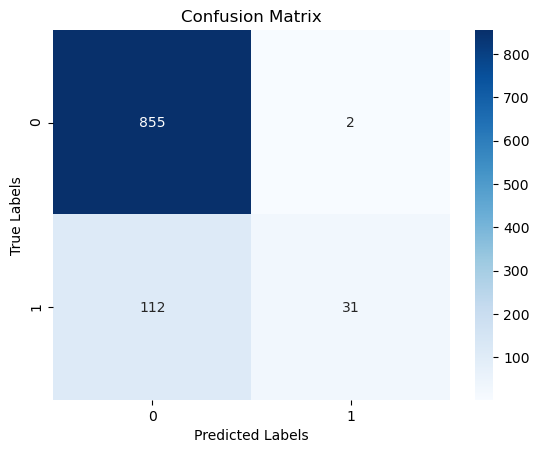

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### AOC & ROC Curve

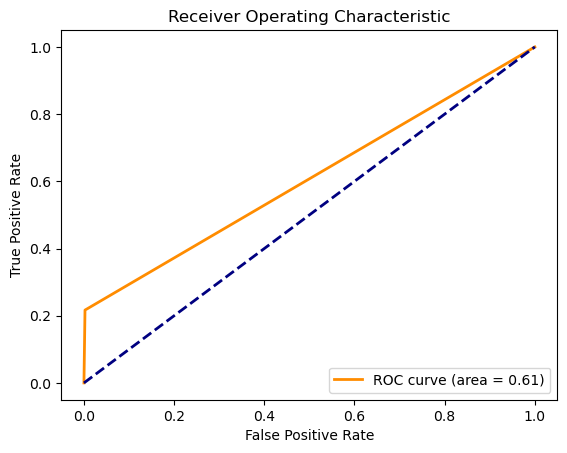

In [28]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Precision Recall Curve

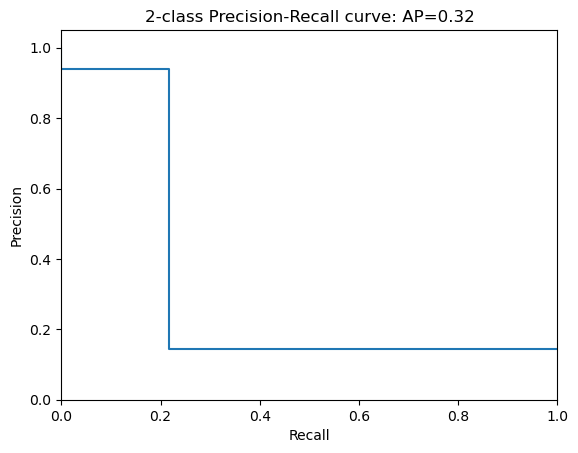

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()